### **CC57 - MACHINE LEARNING - APRENDIZAJE POR REFUERZO: Metodo Q-Learning**

Vamos a implementar un ejemplo básico de la tecnica **Q-Learning** utilizando el entorno **"FrozenLake-v1"** de **OpenAI** Gym.

El ejemplo de **Frozen Lake** es un problema clásico de aprendizaje por refuerzo, donde el objetivo es enseñar a un agente a navegar por un lago congelado y alcanzar la meta sin caer en el hielo. El agente está en un lago congelado y necesita recuperar un elemento y donde algunas partes del lago están congeladas y otras son agujeros (si entra en ellos, muere).

**Acciones:** IZQUIERDA: 0 ABAJO = 1 DERECHA = 2 ARRIBA = 3

En este ejemplo, utilizamos el algoritmo **Q-learning** para entrenar a un agente para que navegue por el entorno de FrozenLake.

**Descripción del problema:** Un agente debe moverse en un lago helado desde el inicio hasta el objetivo sin caer en los agujeros.

**Objetivo:** Demuestra cómo un agente puede aprender a navegar en un entorno simple utilizando **Q-Learning**.

####**Paso #1:  Importar librerías y crear entorno**

Utilizamos gym para crear el entorno "FrozenLake-v1".

In [46]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Crear el entorno
env = gym.make("FrozenLake-v1", new_step_api=False)

####**Paso #2: Inicializar tabla Q**
Se inicializa una matriz de estados por acciones llena de ceros.

In [47]:
# Inicializar la tabla Q con ceros
Q = np.zeros((env.observation_space.n, env.action_space.n))

####**Paso #3: Configuracion de Parámetros de aprendizaje**

Donde alpha es la tasa de aprendizaje, gamma es el factor de descuento y epsilon controla la exploración.

In [48]:
# Parámetros de aprendizaje
alpha = 0.1  # Tasa de aprendizaje
gamma = 0.99  # Factor de descuento
epsilon = 0.1  # Tasa de exploración inicial
episodes = 2000  # Número de episodios
max_steps_per_episode = 100  # Número máximo de pasos por episodio

In [53]:
# Mapeo de acciones a direcciones
# Esta lista facilita la verificación y comprensión de qué acción se está tomando.
actions = ["IZQUIERDA", "ABAJO", "DERECHA", "ARRIBA"]

#### **Paso #4:  Función epsilon-greedy**

Selecciona acciones basadas en una política epsilon-greedy.

In [49]:
# Función epsilon-greedy para seleccionar acciones
def epsilon_greedy(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state, :])

#### **Paso #5: Entrenamiento del agente**
Iteramos sobre episodios y actualizamos la tabla Q con la fórmula de **Q-Learning**.

In [54]:
# Entrenamiento del agente
rewards = []

for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0
    steps = 0

    while not done and steps < max_steps_per_episode:
        action = epsilon_greedy(state, epsilon)
        next_state, reward, done, _ = env.step(action)

        # Debug: Print state, action, reward, next_state
        # se imprimen el episodio, el paso, el estado actual, la acción tomada (usando el nombre descriptivo),
        # la recompensa recibida y el siguiente estado.
        # Esto proporciona una visión clara de cómo el agente interactúa con el entorno y cómo se actualiza la tabla Q.
        print(f"Episode: {episode}, Step: {steps}, State: {state}, Action: {actions[action]}, Reward: {reward}, Next State: {next_state}")

        # Recompensa adicional por llegar al estado final
        if done and reward == 0:
            reward = -1  # Penalizar si cae en un agujero
        elif done and reward == 1:
            reward = 1  # Recompensa si llega al objetivo

        # Actualización de la tabla Q
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

        # Debug: Print Q-table
        print(f"Q[{state}, {action}]: {Q[state, action]}")

        state = next_state
        total_reward += reward
        steps += 1

    rewards.append(total_reward)
    epsilon = max(epsilon * 0.01, 0.01)  # Reducir epsilon gradualmente
    # Al reducir epsilon gradualmente se asegura que el agente explora suficiente al principio y explota más hacia el final del entrenamiento.

Se han truncado las últimas 5000 líneas del flujo de salida.
Episode: 1939, Step: 7, State: 0, Action: IZQUIERDA, Reward: 0.0, Next State: 4
Q[0, 0]: 0.2588101946292618
Episode: 1939, Step: 8, State: 4, Action: IZQUIERDA, Reward: 0.0, Next State: 4
Q[4, 0]: 0.29277624739142305
Episode: 1939, Step: 9, State: 4, Action: IZQUIERDA, Reward: 0.0, Next State: 4
Q[4, 0]: 0.2924834711440316
Episode: 1939, Step: 10, State: 4, Action: IZQUIERDA, Reward: 0.0, Next State: 8
Q[4, 0]: 0.298964201730791
Episode: 1939, Step: 11, State: 8, Action: ARRIBA, Reward: 0.0, Next State: 4
Q[8, 3]: 0.35440725325464423
Episode: 1939, Step: 12, State: 4, Action: IZQUIERDA, Reward: 0.0, Next State: 8
Q[4, 0]: 0.3041540996299217
Episode: 1939, Step: 13, State: 8, Action: ARRIBA, Reward: 0.0, Next State: 9
Q[8, 3]: 0.3641406528731679
Episode: 1939, Step: 14, State: 9, Action: ABAJO, Reward: 0.0, Next State: 8
Q[9, 1]: 0.4467237877616078
Episode: 1939, Step: 15, State: 8, Action: ARRIBA, Reward: 0.0, Next State: 9
Q

####**Paso #6: Mostrar los resultados**

Imprimimos la tabla Q y graficamos las recompensas acumuladas.

Tabla Q:
[[ 0.37464875  0.09817141  0.14358274  0.13782651]
 [-0.3381947  -0.17159641 -0.29658666  0.16253577]
 [-0.14651873 -0.11367652 -0.1793919  -0.0197531 ]
 [-0.38698486 -0.197224   -0.16198201 -0.16051293]
 [ 0.3849231  -0.03216266 -0.00506062 -0.25488681]
 [ 0.          0.          0.          0.        ]
 [-0.33315601 -0.71105309 -0.49749657 -0.61257951]
 [ 0.          0.          0.          0.        ]
 [-0.10107531 -0.10654296  0.0218654   0.38828644]
 [-0.05412005  0.41986837 -0.09338022 -0.11311748]
 [ 0.24966467 -0.07683598 -0.14561138 -0.14606453]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-0.35233074 -0.27504385  0.60666781 -0.079979  ]
 [ 0.35339436  0.89439985  0.3622486   0.4420528 ]
 [ 0.          0.          0.          0.        ]]


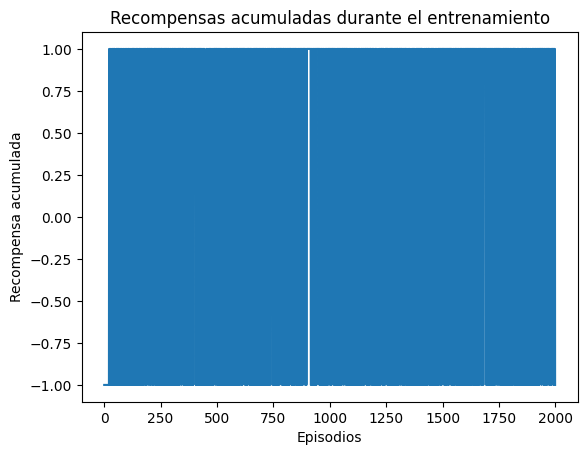

In [52]:
# Mostrar resultados
print("Tabla Q:")
print(Q)

# Graficar las recompensas acumuladas
plt.plot(rewards)
plt.xlabel('Episodios')
plt.ylabel('Recompensa acumulada')
plt.title('Recompensas acumuladas durante el entrenamiento')
plt.show()


**Tarea:**

Revisar un implementacion de Frozenlake en https://gymnasium.farama.org/tutorials/training_agents/FrozenLake_tuto/